# Importing pandas library and reading the .csv file

In [1]:
import pandas as pd

Wine = pd.read_csv(r"winequality-red.csv")
Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Linear Regression Model

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining the predictor columns and the target variable
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates', 'alcohol']
target = 'quality'

# Extracting the features and target from the DataFrame
X = Wine[features]
y = Wine[target]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output of the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.39002514396395427
R^2 Score: 0.403180341279623


# Classification

## Preparing The Data for Classification

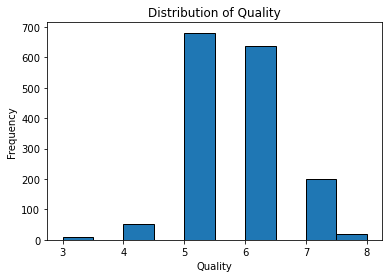

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


In [3]:
# Visualizing the distribution of the 'quality' column
import matplotlib.pyplot as plt

plt.hist(Wine['quality'], bins=10, edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Quality')
plt.show()

# Checking the summary statistics in order to decide on bin edges
print(Wine['quality'].describe())

## Model 1: RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Defining the predictor columns and the target variable
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates', 'alcohol']
target = 'quality'

# Converting the 'quality' column to categorical values (e.g., binning into 3 classes: 0-4 = low, 5-6 = medium, 7-10 = high)
Wine['quality'] = pd.cut(Wine['quality'], bins=[0, 4, 6, 10], labels=['low', 'medium', 'high'])

# Extracting features and target from the DataFrame
X = Wine[features]
y = Wine[target]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying RandomForestClassifier Algorithm and Fitting the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluating RandomForestClassifier & Printing the classification report
print("RandomForestClassifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred, zero_division=1))

RandomForestClassifier Evaluation:
Accuracy: 0.8656
Classification Report:
              precision    recall  f1-score   support

        high       0.69      0.57      0.63        47
         low       1.00      0.00      0.00        11
      medium       0.89      0.95      0.92       262

    accuracy                           0.87       320
   macro avg       0.86      0.51      0.52       320
weighted avg       0.86      0.87      0.85       320



## Model 2: LogisticRegression

In [5]:
from sklearn.linear_model import LogisticRegression

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates', 'alcohol']
target = 'quality'

X = Wine[features]
y = Wine[target]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying LogisticRegression Algorithm and Fitting the model
logreg_model = LogisticRegression(max_iter=10000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_y_pred = logreg_model.predict(X_test)

# Evaluating LogisticRegression & Printing the classification report
print("LogisticRegression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, logreg_y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, logreg_y_pred, zero_division=1))

LogisticRegression Evaluation:
Accuracy: 0.8281
Classification Report:
              precision    recall  f1-score   support

        high       0.57      0.26      0.35        47
         low       1.00      0.00      0.00        11
      medium       0.85      0.97      0.90       262

    accuracy                           0.83       320
   macro avg       0.81      0.41      0.42       320
weighted avg       0.81      0.83      0.79       320



## Model 3: Support Vector Classifier (SVC)

In [6]:
from sklearn.svm import SVC

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates', 'alcohol']
target = 'quality'

X = Wine[features]
y = Wine[target]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Support Vector Classifier (SVC) Algorithm and Fitting the model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)

# Evaluating Support Vector Classifier (SVC) & Printing the classification report
print("Support Vector Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, svc_y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, svc_y_pred, zero_division=1))

Support Vector Classifier Evaluation:
Accuracy: 0.8219
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.02      0.04        47
         low       1.00      0.00      0.00        11
      medium       0.82      1.00      0.90       262

    accuracy                           0.82       320
   macro avg       0.94      0.34      0.31       320
weighted avg       0.85      0.82      0.74       320

